In [47]:
# Library imports.
from pyswmm import Simulation, Links, Output
from swmm.toolkit.shared_enum import LinkAttribute, NodeAttribute, SubcatchAttribute
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import numpy.random as nprnd
import time

# Local imports.
from urbansurge import swmm_model, analysis_tools

In [2]:
# Path to configuration file.
config_path = r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Canandaigua_SWMM\canandaigua_config_physical.yml"

In [3]:
# Create instance of SWMM model.
swmm = swmm_model.SWMM(config_path)

# Configure model.
swmm.configure_model()

Simulation info
Flow Units: CFS
System Units: US
Start Time: 2020-10-17 00:00:00
Start Time: 2020-11-16 23:55:00


In [4]:
# Inlet and outlet offsets.
link_id = 6
initial_diameter = 4
offsets = [0, 0.5, 1, 1.5, 2]

In [5]:
# List of output data frames.
output_df_list = []

# Run the simulation with different offset settings.
for i, offset in enumerate(offsets):
    # Update the link diameter.
    swmm.set_link_geometry(link_id, [initial_diameter - offset, 0, 0, 0])
    
    # Update the offsets.
    swmm.set_link_offsets(link_id, (offset, offset))
    
    # Run the simulation.
    swmm.run_simulation()
    
    # OUTPUT TO DATA FRAME
    # ---------------------------------------------------------------------
    # Get the node depths.
    node_depth_df = swmm.get_node_depth()

    # Get node flooding.
    node_flood_df = swmm.get_node_flooding()
    
    # Get node inflow.
    node_total_inflow_df = swmm.get_node_total_inflow()

    # Get link flow.
    link_flow_df = swmm.get_link_flow()
    
    # Get link depth.
    link_depth_df = swmm.get_link_depth()
    
    # Get link velocity.
    link_velocity_df = swmm.get_link_velocity()

    # Get precipitation time series.
    prcp_df = swmm.get_rainfall_timeseries()

    # Join data frames.
    fault_df = node_depth_df.merge(node_flood_df, on='datetime')
    fault_df = fault_df.merge(node_total_inflow_df, on='datetime')
    fault_df = fault_df.merge(link_flow_df, on='datetime')
    fault_df = fault_df.merge(link_depth_df, on='datetime')
    fault_df = fault_df.merge(link_velocity_df, on='datetime')
    fault_df = fault_df.merge(prcp_df, on='datetime')

    # Add experiment name.
    fault_df['Experiment'] = f'E_{i}'
        
    # Add link offset.
    fault_df[f'L{link_id}_offset'] = round(offset, 2)

    # Add to list.
    output_df_list.append(fault_df)

    # ---------------------------------------------------------------------
    
output_df = pd.concat(output_df_list)

Updated Geom1 value to 4 for 6 in 6
Updated Geom2 value to 0 for 6 in 6
Updated Geom3 value to 0 for 6 in 6
Updated Geom4 value to 0 for 6 in 6
Set Link 6 geometry to [4, 0, 0, 0]
Updated InOffset value to 0 for 6 in 6
Updated OutOffset value to 0 for 6 in 6
Set Link 6 offsets to (0, 0)
INP PATH: C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Canandaigua_SWMM\Canandaigua_physical_system_tmp.inp
2020-10-17 00:00:01 , 0
2020-10-17 00:50:01 , 0
2020-10-17 01:40:01 , 0
2020-10-17 02:30:01 , 0
2020-10-17 03:20:01 , 0
2020-10-17 04:10:01 , 1
2020-10-17 05:00:01 , 1
2020-10-17 05:50:01 , 1
2020-10-17 06:40:01 , 1
2020-10-17 07:30:01 , 1
2020-10-17 08:20:01 , 1
2020-10-17 09:10:01 , 1
2020-10-17 10:00:01 , 1
2020-10-17 10:50:01 , 1
2020-10-17 11:40:01 , 2
2020-10-17 12:30:01 , 2
2020-10-17 13:20:01 , 2
2020-10-17 14:10:01 , 2
2020-10-17 15:00:01 , 2
2020-10-17 15:50:01 , 2
2020-10-17 16:40:01 , 2
2020-10-17 17:30:01 , 2
2020-10-17 18:20:01 , 2
2020-10-17 19:10:01 , 3
2020-10-17 20:00:01 

2020-10-29 19:12:17 , 41
2020-10-29 20:02:17 , 41
2020-10-29 20:52:17 , 42
2020-10-29 21:42:17 , 42
2020-10-29 22:32:17 , 42
2020-10-29 23:22:17 , 42
2020-10-30 00:12:17 , 42
2020-10-30 01:02:17 , 42
2020-10-30 01:52:17 , 42
2020-10-30 02:42:17 , 42
2020-10-30 03:32:17 , 42
2020-10-30 04:22:17 , 43
2020-10-30 05:12:17 , 43
2020-10-30 06:02:17 , 43
2020-10-30 06:52:17 , 43
2020-10-30 07:42:17 , 43
2020-10-30 08:32:17 , 43
2020-10-30 09:22:17 , 43
2020-10-30 10:12:14 , 43
2020-10-30 10:57:54 , 43
2020-10-30 11:40:02 , 44
2020-10-30 12:19:47 , 44
2020-10-30 12:59:14 , 44
2020-10-30 13:39:33 , 44
2020-10-30 14:20:59 , 44
2020-10-30 15:03:47 , 44
2020-10-30 15:47:49 , 44
2020-10-30 16:31:57 , 44
2020-10-30 17:16:35 , 44
2020-10-30 18:02:23 , 44
2020-10-30 18:48:52 , 44
2020-10-30 19:36:31 , 45
2020-10-30 20:21:53 , 45
2020-10-30 21:04:24 , 45
2020-10-30 21:46:05 , 45
2020-10-30 22:27:29 , 45
2020-10-30 23:08:33 , 45
2020-10-30 23:49:07 , 45
2020-10-31 00:28:45 , 45
2020-10-31 01:10:30 , 45


2020-11-13 13:07:04 , 89
2020-11-13 13:57:04 , 89
2020-11-13 14:47:04 , 89
2020-11-13 15:37:04 , 89
2020-11-13 16:27:04 , 89
2020-11-13 17:17:04 , 89
2020-11-13 18:07:04 , 90
2020-11-13 18:57:04 , 90
2020-11-13 19:47:04 , 90
2020-11-13 20:37:04 , 90
2020-11-13 21:27:04 , 90
2020-11-13 22:17:04 , 90
2020-11-13 23:07:04 , 90
2020-11-13 23:57:04 , 90
2020-11-14 00:47:04 , 90
2020-11-14 01:37:04 , 91
2020-11-14 02:27:04 , 91
2020-11-14 03:17:04 , 91
2020-11-14 04:07:04 , 91
2020-11-14 04:57:04 , 91
2020-11-14 05:47:04 , 91
2020-11-14 06:37:04 , 91
2020-11-14 07:27:04 , 91
2020-11-14 08:17:04 , 91
2020-11-14 09:07:04 , 92
2020-11-14 09:57:04 , 92
2020-11-14 10:47:04 , 92
2020-11-14 11:37:04 , 92
2020-11-14 12:27:04 , 92
2020-11-14 13:17:04 , 92
2020-11-14 14:07:04 , 92
2020-11-14 14:57:04 , 92
2020-11-14 15:47:04 , 92
2020-11-14 16:37:04 , 93
2020-11-14 17:27:04 , 93
2020-11-14 18:17:04 , 93
2020-11-14 19:07:04 , 93
2020-11-14 19:57:04 , 93
2020-11-14 20:47:04 , 93
2020-11-14 21:37:04 , 93


2020-10-26 03:42:12 , 30
2020-10-26 04:32:12 , 30
2020-10-26 05:22:12 , 30
2020-10-26 06:12:12 , 30
2020-10-26 07:02:12 , 30
2020-10-26 07:52:12 , 30
2020-10-26 08:42:12 , 30
2020-10-26 09:32:12 , 30
2020-10-26 10:22:12 , 30
2020-10-26 11:12:12 , 31
2020-10-26 12:02:12 , 31
2020-10-26 12:52:12 , 31
2020-10-26 13:42:12 , 31
2020-10-26 14:32:12 , 31
2020-10-26 15:22:12 , 31
2020-10-26 16:12:12 , 31
2020-10-26 17:02:12 , 31
2020-10-26 17:52:12 , 31
2020-10-26 18:42:12 , 32
2020-10-26 19:32:12 , 32
2020-10-26 20:22:12 , 32
2020-10-26 21:12:12 , 32
2020-10-26 22:02:12 , 32
2020-10-26 22:52:12 , 32
2020-10-26 23:42:12 , 32
2020-10-27 00:32:12 , 32
2020-10-27 01:22:12 , 32
2020-10-27 02:12:12 , 33
2020-10-27 03:02:12 , 33
2020-10-27 03:52:12 , 33
2020-10-27 04:42:12 , 33
2020-10-27 05:32:12 , 33
2020-10-27 06:22:12 , 33
2020-10-27 07:12:12 , 33
2020-10-27 08:02:12 , 33
2020-10-27 08:52:12 , 33
2020-10-27 09:42:12 , 34
2020-10-27 10:32:12 , 34
2020-10-27 11:22:12 , 34
2020-10-27 12:12:12 , 34


2020-11-07 02:26:35 , 68
2020-11-07 03:16:35 , 68
2020-11-07 04:06:35 , 68
2020-11-07 04:56:35 , 68
2020-11-07 05:46:35 , 69
2020-11-07 06:36:35 , 69
2020-11-07 07:26:35 , 69
2020-11-07 08:16:35 , 69
2020-11-07 09:06:35 , 69
2020-11-07 09:56:35 , 69
2020-11-07 10:46:35 , 69
2020-11-07 11:36:35 , 69
2020-11-07 12:26:35 , 69
2020-11-07 13:16:35 , 70
2020-11-07 14:06:35 , 70
2020-11-07 14:56:35 , 70
2020-11-07 15:46:35 , 70
2020-11-07 16:36:35 , 70
2020-11-07 17:26:35 , 70
2020-11-07 18:16:35 , 70
2020-11-07 19:06:35 , 70
2020-11-07 19:56:35 , 70
2020-11-07 20:46:35 , 71
2020-11-07 21:36:35 , 71
2020-11-07 22:26:35 , 71
2020-11-07 23:16:35 , 71
2020-11-08 00:06:35 , 71
2020-11-08 00:56:35 , 71
2020-11-08 01:46:35 , 71
2020-11-08 02:36:35 , 71
2020-11-08 03:26:35 , 71
2020-11-08 04:16:35 , 72
2020-11-08 05:06:35 , 72
2020-11-08 05:56:35 , 72
2020-11-08 06:46:35 , 72
2020-11-08 07:36:35 , 72
2020-11-08 08:26:35 , 72
2020-11-08 09:16:35 , 72
2020-11-08 10:06:35 , 72
2020-11-08 10:56:35 , 72


2020-10-19 08:40:01 , 8
2020-10-19 09:30:01 , 8
2020-10-19 10:20:01 , 8
2020-10-19 11:10:01 , 8
2020-10-19 12:00:01 , 8
2020-10-19 12:50:01 , 8
2020-10-19 13:40:01 , 8
2020-10-19 14:30:01 , 8
2020-10-19 15:20:01 , 9
2020-10-19 16:10:01 , 9
2020-10-19 17:00:01 , 9
2020-10-19 17:50:01 , 9
2020-10-19 18:40:01 , 9
2020-10-19 19:30:01 , 9
2020-10-19 20:20:01 , 9
2020-10-19 21:10:01 , 9
2020-10-19 22:00:01 , 9
2020-10-19 22:50:01 , 10
2020-10-19 23:40:01 , 10
2020-10-20 00:29:33 , 10
2020-10-20 01:19:33 , 10
2020-10-20 02:09:33 , 10
2020-10-20 02:59:33 , 10
2020-10-20 03:49:33 , 10
2020-10-20 04:39:07 , 10
2020-10-20 05:29:07 , 10
2020-10-20 06:19:07 , 11
2020-10-20 07:09:07 , 11
2020-10-20 07:59:07 , 11
2020-10-20 08:48:10 , 11
2020-10-20 09:31:57 , 11
2020-10-20 10:11:48 , 11
2020-10-20 10:50:09 , 11
2020-10-20 11:27:11 , 11
2020-10-20 12:02:38 , 11
2020-10-20 12:35:39 , 11
2020-10-20 13:08:05 , 11
2020-10-20 13:38:54 , 12
2020-10-20 14:08:44 , 12
2020-10-20 14:37:26 , 12
2020-10-20 15:05:

2020-11-01 22:53:31 , 51
2020-11-01 23:43:31 , 52
2020-11-02 00:33:31 , 52
2020-11-02 01:23:31 , 52
2020-11-02 02:13:31 , 52
2020-11-02 03:03:31 , 52
2020-11-02 03:53:31 , 52
2020-11-02 04:43:31 , 52
2020-11-02 05:33:31 , 52
2020-11-02 06:23:31 , 52
2020-11-02 07:13:31 , 53
2020-11-02 08:03:28 , 53
2020-11-02 08:50:40 , 53
2020-11-02 09:35:49 , 53
2020-11-02 10:22:19 , 53
2020-11-02 11:10:17 , 53
2020-11-02 11:59:24 , 53
2020-11-02 12:49:24 , 53
2020-11-02 13:39:24 , 53
2020-11-02 14:28:58 , 54
2020-11-02 15:16:09 , 54
2020-11-02 16:01:51 , 54
2020-11-02 16:48:04 , 54
2020-11-02 17:35:45 , 54
2020-11-02 18:25:34 , 54
2020-11-02 19:15:34 , 54
2020-11-02 20:05:34 , 54
2020-11-02 20:55:34 , 54
2020-11-02 21:45:34 , 55
2020-11-02 22:35:34 , 55
2020-11-02 23:24:43 , 55
2020-11-03 00:10:06 , 55
2020-11-03 00:56:55 , 55
2020-11-03 01:46:38 , 55
2020-11-03 02:36:38 , 55
2020-11-03 03:26:38 , 55
2020-11-03 04:16:38 , 55
2020-11-03 05:06:38 , 56
2020-11-03 05:56:38 , 56
2020-11-03 06:46:38 , 56


2020-11-13 22:17:13 , 90
2020-11-13 23:07:13 , 90
2020-11-13 23:57:13 , 90
2020-11-14 00:47:13 , 90
2020-11-14 01:37:13 , 91
2020-11-14 02:27:13 , 91
2020-11-14 03:17:13 , 91
2020-11-14 04:07:13 , 91
2020-11-14 04:57:13 , 91
2020-11-14 05:47:13 , 91
2020-11-14 06:37:13 , 91
2020-11-14 07:27:13 , 91
2020-11-14 08:17:13 , 91
2020-11-14 09:07:13 , 92
2020-11-14 09:57:13 , 92
2020-11-14 10:47:13 , 92
2020-11-14 11:37:13 , 92
2020-11-14 12:27:13 , 92
2020-11-14 13:17:13 , 92
2020-11-14 14:07:13 , 92
2020-11-14 14:57:13 , 92
2020-11-14 15:47:13 , 92
2020-11-14 16:37:13 , 93
2020-11-14 17:27:13 , 93
2020-11-14 18:17:13 , 93
2020-11-14 19:07:13 , 93
2020-11-14 19:57:13 , 93
2020-11-14 20:47:13 , 93
2020-11-14 21:37:13 , 93
2020-11-14 22:27:13 , 93
2020-11-14 23:17:13 , 93
2020-11-15 00:07:13 , 94
2020-11-15 00:57:13 , 94
2020-11-15 01:47:13 , 94
2020-11-15 02:37:13 , 94
2020-11-15 03:27:13 , 94
2020-11-15 04:17:13 , 94
2020-11-15 05:07:13 , 94
2020-11-15 05:57:13 , 94
2020-11-15 06:47:13 , 94


2020-10-25 04:21:57 , 26
2020-10-25 05:11:57 , 27
2020-10-25 06:01:57 , 27
2020-10-25 06:51:57 , 27
2020-10-25 07:41:57 , 27
2020-10-25 08:31:57 , 27
2020-10-25 09:21:57 , 27
2020-10-25 10:11:57 , 27
2020-10-25 11:01:57 , 27
2020-10-25 11:51:57 , 27
2020-10-25 12:41:57 , 28
2020-10-25 13:31:57 , 28
2020-10-25 14:21:57 , 28
2020-10-25 15:11:57 , 28
2020-10-25 16:01:57 , 28
2020-10-25 16:51:57 , 28
2020-10-25 17:41:57 , 28
2020-10-25 18:31:57 , 28
2020-10-25 19:21:57 , 28
2020-10-25 20:11:57 , 29
2020-10-25 21:01:57 , 29
2020-10-25 21:51:57 , 29
2020-10-25 22:41:57 , 29
2020-10-25 23:31:57 , 29
2020-10-26 00:21:57 , 29
2020-10-26 01:11:57 , 29
2020-10-26 02:01:57 , 29
2020-10-26 02:51:57 , 29
2020-10-26 03:41:57 , 30
2020-10-26 04:31:57 , 30
2020-10-26 05:21:57 , 30
2020-10-26 06:11:57 , 30
2020-10-26 07:01:57 , 30
2020-10-26 07:51:57 , 30
2020-10-26 08:41:57 , 30
2020-10-26 09:31:57 , 30
2020-10-26 10:21:57 , 30
2020-10-26 11:11:57 , 31
2020-10-26 12:01:57 , 31
2020-10-26 12:51:57 , 31


2020-11-06 03:06:42 , 65
2020-11-06 03:56:42 , 65
2020-11-06 04:46:42 , 65
2020-11-06 05:36:42 , 65
2020-11-06 06:26:42 , 65
2020-11-06 07:16:42 , 66
2020-11-06 08:06:42 , 66
2020-11-06 08:56:42 , 66
2020-11-06 09:46:42 , 66
2020-11-06 10:36:42 , 66
2020-11-06 11:26:42 , 66
2020-11-06 12:16:42 , 66
2020-11-06 13:06:42 , 66
2020-11-06 13:56:42 , 66
2020-11-06 14:46:42 , 67
2020-11-06 15:36:42 , 67
2020-11-06 16:26:42 , 67
2020-11-06 17:16:42 , 67
2020-11-06 18:06:42 , 67
2020-11-06 18:56:42 , 67
2020-11-06 19:46:42 , 67
2020-11-06 20:36:42 , 67
2020-11-06 21:26:42 , 67
2020-11-06 22:16:42 , 68
2020-11-06 23:06:42 , 68
2020-11-06 23:56:42 , 68
2020-11-07 00:46:42 , 68
2020-11-07 01:36:42 , 68
2020-11-07 02:26:42 , 68
2020-11-07 03:16:42 , 68
2020-11-07 04:06:42 , 68
2020-11-07 04:56:42 , 68
2020-11-07 05:46:42 , 69
2020-11-07 06:36:42 , 69
2020-11-07 07:26:42 , 69
2020-11-07 08:16:42 , 69
2020-11-07 09:06:42 , 69
2020-11-07 09:56:42 , 69
2020-11-07 10:46:42 , 69
2020-11-07 11:36:42 , 69


2020-10-19 00:20:01 , 6
2020-10-19 01:10:01 , 7
2020-10-19 02:00:01 , 7
2020-10-19 02:50:01 , 7
2020-10-19 03:40:01 , 7
2020-10-19 04:30:01 , 7
2020-10-19 05:20:01 , 7
2020-10-19 06:10:01 , 7
2020-10-19 07:00:01 , 7
2020-10-19 07:50:01 , 8
2020-10-19 08:40:01 , 8
2020-10-19 09:30:01 , 8
2020-10-19 10:20:01 , 8
2020-10-19 11:10:01 , 8
2020-10-19 12:00:01 , 8
2020-10-19 12:50:01 , 8
2020-10-19 13:40:01 , 8
2020-10-19 14:30:01 , 8
2020-10-19 15:20:01 , 9
2020-10-19 16:10:01 , 9
2020-10-19 17:00:01 , 9
2020-10-19 17:50:01 , 9
2020-10-19 18:40:01 , 9
2020-10-19 19:30:01 , 9
2020-10-19 20:20:01 , 9
2020-10-19 21:10:01 , 9
2020-10-19 22:00:01 , 9
2020-10-19 22:50:01 , 10
2020-10-19 23:40:01 , 10
2020-10-20 00:29:33 , 10
2020-10-20 01:19:33 , 10
2020-10-20 02:09:33 , 10
2020-10-20 02:59:33 , 10
2020-10-20 03:49:33 , 10
2020-10-20 04:39:33 , 10
2020-10-20 05:29:33 , 10
2020-10-20 06:19:24 , 11
2020-10-20 07:09:24 , 11
2020-10-20 07:59:24 , 11
2020-10-20 08:48:28 , 11
2020-10-20 09:32:14 , 11
20

2020-10-31 01:10:38 , 45
2020-10-31 01:55:31 , 45
2020-10-31 02:43:39 , 46
2020-10-31 03:33:39 , 46
2020-10-31 04:23:39 , 46
2020-10-31 05:13:39 , 46
2020-10-31 06:03:39 , 46
2020-10-31 06:53:39 , 46
2020-10-31 07:43:39 , 46
2020-10-31 08:33:39 , 46
2020-10-31 09:23:39 , 46
2020-10-31 10:13:39 , 47
2020-10-31 11:03:39 , 47
2020-10-31 11:53:39 , 47
2020-10-31 12:43:39 , 47
2020-10-31 13:33:39 , 47
2020-10-31 14:23:39 , 47
2020-10-31 15:13:39 , 47
2020-10-31 16:03:39 , 47
2020-10-31 16:53:39 , 47
2020-10-31 17:43:39 , 48
2020-10-31 18:33:39 , 48
2020-10-31 19:23:39 , 48
2020-10-31 20:13:39 , 48
2020-10-31 21:03:39 , 48
2020-10-31 21:53:39 , 48
2020-10-31 22:43:39 , 48
2020-10-31 23:33:39 , 48
2020-11-01 00:23:39 , 48
2020-11-01 01:13:39 , 49
2020-11-01 02:03:39 , 49
2020-11-01 02:53:39 , 49
2020-11-01 03:43:39 , 49
2020-11-01 04:33:39 , 49
2020-11-01 05:23:39 , 49
2020-11-01 06:13:39 , 49
2020-11-01 07:03:39 , 49
2020-11-01 07:53:39 , 49
2020-11-01 08:43:39 , 50
2020-11-01 09:33:39 , 50


2020-11-12 00:28:46 , 84
2020-11-12 01:17:23 , 84
2020-11-12 02:07:23 , 84
2020-11-12 02:57:23 , 84
2020-11-12 03:47:23 , 84
2020-11-12 04:37:23 , 85
2020-11-12 05:27:23 , 85
2020-11-12 06:17:23 , 85
2020-11-12 07:07:23 , 85
2020-11-12 07:57:23 , 85
2020-11-12 08:47:23 , 85
2020-11-12 09:37:23 , 85
2020-11-12 10:27:23 , 85
2020-11-12 11:17:23 , 85
2020-11-12 12:07:23 , 86
2020-11-12 12:57:23 , 86
2020-11-12 13:47:23 , 86
2020-11-12 14:37:23 , 86
2020-11-12 15:27:23 , 86
2020-11-12 16:17:23 , 86
2020-11-12 17:07:23 , 86
2020-11-12 17:57:23 , 86
2020-11-12 18:47:23 , 86
2020-11-12 19:37:23 , 87
2020-11-12 20:27:23 , 87
2020-11-12 21:17:23 , 87
2020-11-12 22:07:23 , 87
2020-11-12 22:57:23 , 87
2020-11-12 23:47:23 , 87
2020-11-13 00:37:23 , 87
2020-11-13 01:27:23 , 87
2020-11-13 02:17:23 , 87
2020-11-13 03:07:23 , 88
2020-11-13 03:57:23 , 88
2020-11-13 04:47:23 , 88
2020-11-13 05:37:23 , 88
2020-11-13 06:27:23 , 88
2020-11-13 07:17:23 , 88
2020-11-13 08:07:23 , 88
2020-11-13 08:57:23 , 88


In [6]:
output_df.head()

,Depth_node_15,Depth_node_16,Depth_node_18,Depth_node_19,Depth_node_20,Depth_node_12,Depth_node_13,Depth_node_14,Depth_node_17,Depth_node_21,...,Velocity_link_5,Velocity_link_6,Velocity_link_7,Velocity_link_8,Velocity_link_9,Velocity_link_10,Velocity_link_11,prcp,Experiment,L6_offset
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E_0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E_0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E_0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E_0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E_0,0.0


## Run healthy model.

In [7]:
# Path to configuration file.
model_config_path = r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Canandaigua_SWMM\canandaigua_config_healthy.yml"

In [8]:
# Create instance of SWMM model.
model_swmm = swmm_model.SWMM(config_path)

# Configure model.
model_swmm.configure_model()

Simulation info
Flow Units: CFS
System Units: US
Start Time: 2020-10-17 00:00:00
Start Time: 2020-11-16 23:55:00


In [9]:
# OUTPUT TO DATA FRAME
# ---------------------------------------------------------------------
# Get the node depths.
node_depth_df = model_swmm.get_node_depth()

# Get node flooding.
node_flood_df = model_swmm.get_node_flooding()

# Get node inflow.
node_total_inflow_df = model_swmm.get_node_total_inflow()

# Get link flow.
link_flow_df = model_swmm.get_link_flow()

# Get link depth.
link_depth_df = model_swmm.get_link_depth()

# Get link velocity.
link_velocity_df = model_swmm.get_link_velocity()

# Get precipitation time series.
prcp_df = model_swmm.get_rainfall_timeseries()

# Join data frames.
model_df = node_depth_df.merge(node_flood_df, on='datetime')
model_df = model_df.merge(node_total_inflow_df, on='datetime')
model_df = model_df.merge(link_flow_df, on='datetime')
model_df = model_df.merge(link_depth_df, on='datetime')
model_df = model_df.merge(link_velocity_df, on='datetime')
model_df = model_df.merge(prcp_df, on='datetime')

model_df.head()

,Depth_node_15,Depth_node_16,Depth_node_18,Depth_node_19,Depth_node_20,Depth_node_12,Depth_node_13,Depth_node_14,Depth_node_17,Depth_node_21,...,Velocity_link_1,Velocity_link_2,Velocity_link_5,Velocity_link_6,Velocity_link_7,Velocity_link_8,Velocity_link_9,Velocity_link_10,Velocity_link_11,prcp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Plotting

C:\Users\ay434\AppData\Local\Temp\ipykernel_22268\3473885918.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
C:\Users\ay434\AppData\Local\Temp\ipykernel_22268\3473885918.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


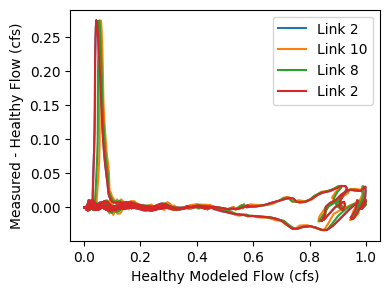

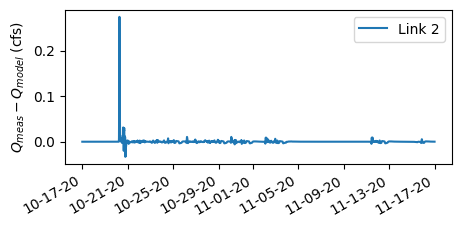

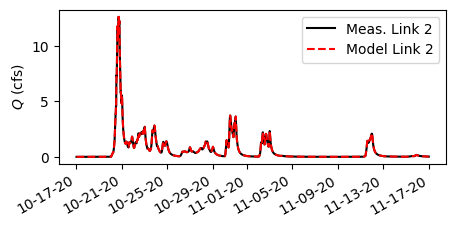

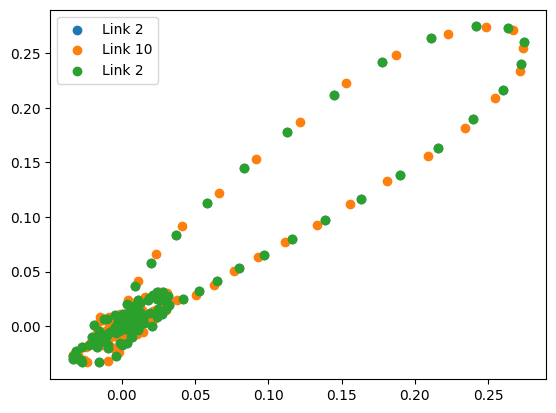

In [67]:
plot_link_id = 2
plot_node_id = 21

plot_df_meas = output_df.loc[output_df[f'L{link_id}_offset'] == 1.5, :]
plot_df_meas1 = output_df.loc[output_df[f'L{link_id}_offset'] == 1.0, :]

# Noise.
nobs = plot_df_meas.shape[0]

# Plot flow time series against each other.
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(model_df[f'Flow_link_{plot_link_id}'] / np.max(model_df[f'Flow_link_{plot_link_id}']), 
           plot_df_meas[f'Flow_link_{plot_link_id}'] - model_df[f'Flow_link_{plot_link_id}'],
       label=f'Link {plot_link_id}')
ax.plot(model_df[f'Flow_link_{10}'] / np.max(model_df[f'Flow_link_{10}']), 
           plot_df_meas[f'Flow_link_{10}'] - model_df[f'Flow_link_{10}'],
       label=f'Link {10}')
ax.plot(model_df[f'Flow_link_{8}'] / np.max(model_df[f'Flow_link_{8}']), 
           plot_df_meas[f'Flow_link_{8}'] - model_df[f'Flow_link_{8}'],
       label=f'Link {8}')
ax.plot(model_df[f'Flow_link_{2}'] / np.max(model_df[f'Flow_link_{2}']), 
           plot_df_meas[f'Flow_link_{2}'] - model_df[f'Flow_link_{2}'],
       label=f'Link {2}')
ax.set_xlabel('Healthy Modeled Flow (cfs)')
ax.set_ylabel('Measured - Healthy Flow (cfs)')
ax.legend()

# Residual time series.
fig, ax = plt.subplots(figsize=(5,2))
ax.plot(model_df['datetime'], 
        plot_df_meas[f'Flow_link_{plot_link_id}']- model_df[f'Flow_link_{plot_link_id}'],
       label=f'Link {plot_link_id}')
# ax.plot(model_df['datetime'], plot_df_meas[f'Flow_link_{10}'] - model_df[f'Flow_link_{10}'],
#        label=f'Link {10}')
ax.set_ylabel('$Q_{meas} - Q_{model}$ (cfs)')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.legend()

# Flow time series.
fig, ax = plt.subplots(figsize=(5,2))
ax.plot(model_df['datetime'], model_df[f'Flow_link_{plot_link_id}'], 'k',
       label=f'Meas. Link {plot_link_id}')
ax.plot(model_df['datetime'], model_df[f'Flow_link_{plot_link_id}'], 'r--',
       label=f'Model Link {plot_link_id}')
ax.set_ylabel('$Q$ (cfs)')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.legend()

# Residual differences.
r1 = plot_df_meas[f'Flow_link_{plot_link_id}'] - model_df[f'Flow_link_{plot_link_id}']
r1 = r1.to_numpy()
r2 = plot_df_meas[f'Flow_link_{10}'] - model_df[f'Flow_link_{10}']
r2 = r2.to_numpy()
r3 = plot_df_meas[f'Flow_link_{2}'] - model_df[f'Flow_link_{2}']
r3 = r3.to_numpy()

fig, ax = plt.subplots()
ax.scatter(r1[:-2], r1[2:], label=f'Link {plot_link_id}')
ax.scatter(r2[:-2], r2[2:], label=f'Link {10}')
ax.scatter(r3[:-2], r3[2:], label=f'Link {2}')
ax.legend()

C:\Users\ay434\AppData\Local\Temp\ipykernel_13544\224548577.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


Text(0, 0.5, 'Total Inflow')

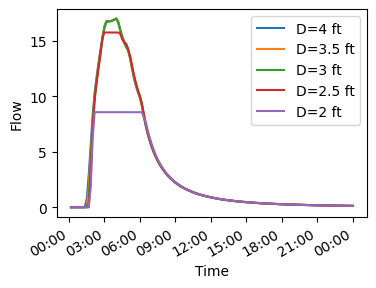

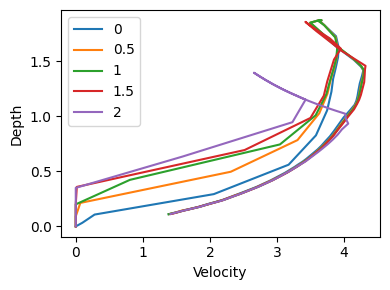

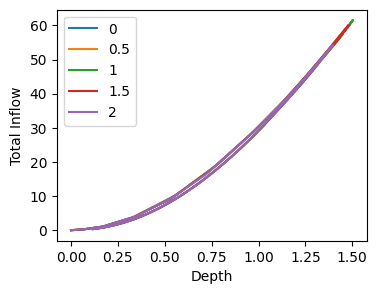

In [7]:
# Plot the output for a certain link.
plot_link_id = 7
plot_node_id = 20

# Flow time series.
fig, ax = plt.subplots(figsize=(4,3))
for i, offset in enumerate(offsets):
    plot_df = output_df.loc[output_df[f'L{link_id}_offset'] == offset, :]
    ax.plot(plot_df['datetime'], plot_df[f'Flow_{plot_link_id}'], label=f'D={initial_diameter - offset} ft')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Flow')
fig.tight_layout()

# Depth vs. velocity.
fig, ax = plt.subplots(figsize=(4,3))
for i, offset in enumerate(offsets):
    plot_df = output_df.loc[output_df[f'L{link_id}_offset'] == offset, :]
    ax.plot(plot_df[f'Velocity_{plot_link_id}'], plot_df[f'Depth_{plot_link_id}'], label=offset)
ax.legend()
ax.set_xlabel('Velocity')
ax.set_ylabel('Depth')
fig.tight_layout()
# fig.savefig(r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Output\Figures\depth_velocity_L{}.png".format(plot_link_id),
#            dpi=300)

# Node inflow and depth.
fig, ax = plt.subplots(figsize=(4,3))
for i, offset in enumerate(offsets):
    plot_df = output_df.loc[output_df[f'L{link_id}_offset'] == offset, :]
    ax.plot(plot_df[f'Depth_{plot_node_id}'], plot_df[f'Total_Inflow_{plot_node_id}'], label=offset)
ax.legend()
ax.set_xlabel('Depth')
ax.set_ylabel('Total Inflow')